In [1]:
import tensorflow as tf
from emulator.main import Account
from agent.access import Access
from agent.main import Framework
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
state_size = [50, 58, 5]
action_size = 3

with tf.Session() as sess:
    with tf.device("/cpu:0"):
        A = Access(state_size, action_size)
        W = Framework(A, state_size, action_size, 'AC')
        A.restore(sess,'model/saver_1.ckpt')
        W.init_network(sess)
        env = Account()
        state = env.reset()
        net_value = []
        reward_list = []
        for _ in range(1400):
            action = W.get_deterministic_policy_action(sess, state)
            reward, state, done = env.step(action)
            reward_list.append(reward)
            net_value.append(env.total_value)

graph AC
INFO:tensorflow:Restoring parameters from model/saver_1.ckpt


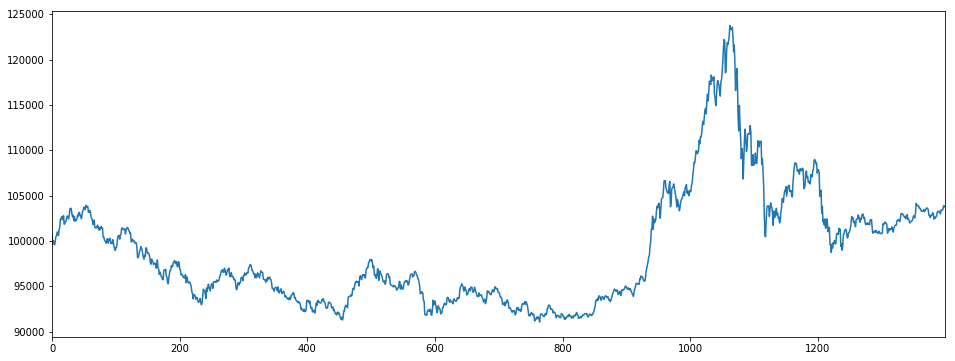

In [3]:
pd.Series(net_value).plot(figsize=(16,6))

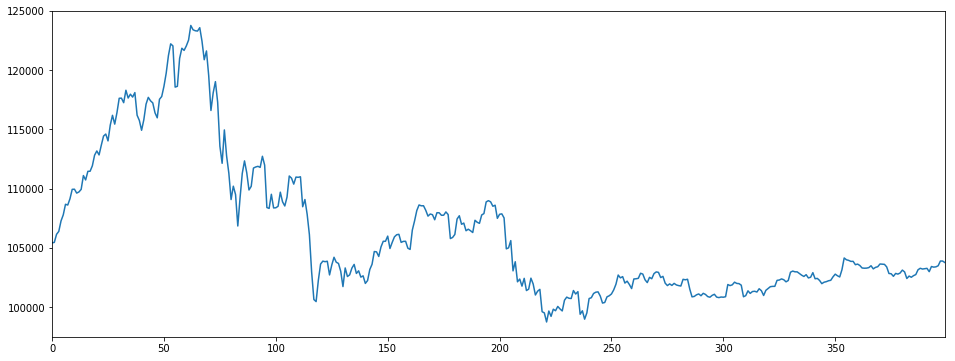

In [4]:
pd.Series(net_value[1000:]).plot(figsize=(16,6))

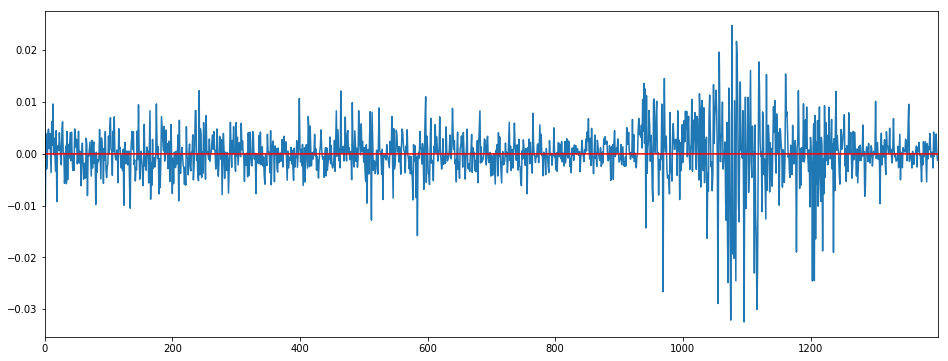

In [5]:
pd.Series(reward_list).plot(figsize=(16,6))
pd.Series(np.zeros_like(reward_list)).plot(figsize=(16,6), color='r')

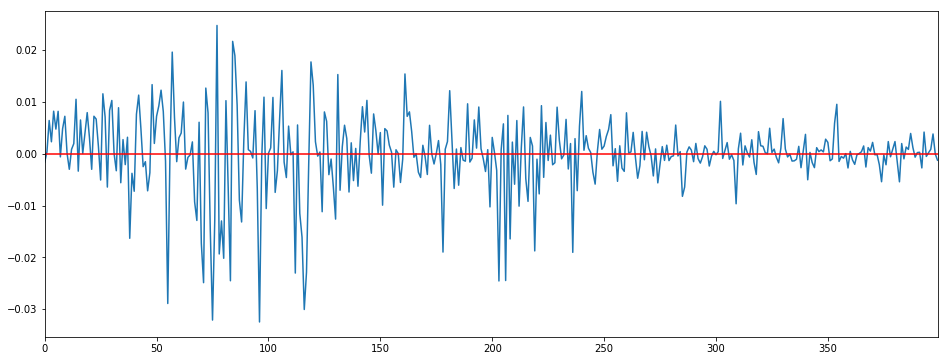

In [6]:
reward_list = reward_list[1000:]
pd.Series(reward_list).plot(figsize=(16,6))
pd.Series(np.zeros_like(reward_list)).plot(figsize=(16,6), color='r')
